In [1]:
%matplotlib inline

import networkx as nx
from scipy.stats import kendalltau
from operator import itemgetter

import load_connectivity
import graphing

from IPython.display import Image


In [2]:
""" load the 2015 data, which you can in the supplimentary document S2
    http://www.sciencedirect.com/science/article/pii/S096098221500336X
"""
network = load_connectivity.load_2015_connectivity_matrix()


In [3]:
betweenness_centrality = nx.betweenness_centrality(network,weight='distance')

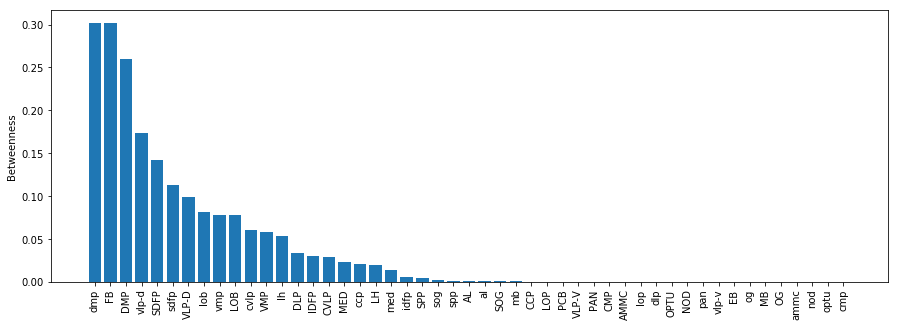

In [4]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,5]
graphing.plot_measurement(betweenness_centrality ,network.nodes(),"Betweenness")

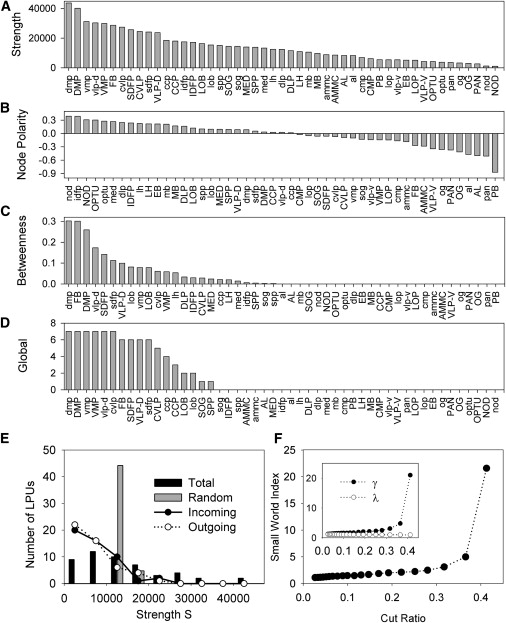

In [5]:
Image("http://ars.els-cdn.com/content/image/1-s2.0-S096098221500336X-gr1.jpg")

In [6]:
paper_betweenness_centrality_order = ["dmp","FB","DMP","vlp-d","SDFP","sdfp","VLP-D","lop","vmb","LOB","cvlp",
                                      "VMP","lh","DLP","IDFP","CVLP","MED","ccp","LH","med","idfp","SPP","sog",
                                      "spp","al","AL","mb","SOG","nod","NOD","OPTU","optu","dlp","EB","MB","CCP",
                                      "CMP","lop","vlp-v","LOP","cmp","ammc","AMMC","VLP-V","og","PAN","OG","pan",
                                      "PB"]



In [7]:
s = sorted(betweenness_centrality.iteritems(), key=itemgetter(1), reverse=True)
our_betweenness_centrality_order = list(zip(*s)[0])
our_betweenness_centrality_weight = list(zip(*s)[1])
print our_betweenness_centrality_order

['dmp', 'FB', 'DMP', 'vlp-d', 'SDFP', 'sdfp', 'VLP-D', 'lob', 'vmp', 'LOB', 'cvlp', 'VMP', 'lh', 'DLP', 'IDFP', 'CVLP', 'MED', 'ccp', 'LH', 'med', 'idfp', 'SPP', 'sog', 'spp', 'AL', 'al', 'SOG', 'mb', 'CCP', 'LOP', 'PCB', 'VLP-V', 'PAN', 'CMP', 'AMMC', 'lop', 'dlp', 'OPTU', 'NOD', 'pan', 'vlp-v', 'EB', 'og', 'MB', 'OG', 'ammc', 'nod', 'optu', 'cmp']


In [10]:
""" we can test how faithful our reproduction is, by testing the rank distance between their
    reported centrality, and our caluculated centrality using the Kendall Tau distance.
"""
kendalltau(our_betweenness_centrality_order,paper_betweenness_centrality_order)

KendalltauResult(correlation=0.3258188299845477, pvalue=0.00095724126420945158)

In [11]:
""" we can see that the ordering is lost, when centrality is zero, giving us a reduced kendalltau distance
    if we take a look at our distance, for the list where the score is non-zero, we get a more reasonable score.
"""
sorted_untill = our_betweenness_centrality_weight.index(0.0)-1
kendalltau(our_betweenness_centrality_order[0:sorted_untill],paper_betweenness_centrality_order[0:sorted_untill])

KendalltauResult(correlation=0.80056980056980065, pvalue=4.6852670617828282e-09)